# The annotated Construct and Reducer 

In [1]:
%load_ext dotenv
%dotenv

In [37]:
from langgraph.graph import START, END, StateGraph, add_messages, MessagesState
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import HumanMessage, BaseMessage, AIMessage, RemoveMessage
from collections.abc import Sequence
from typing import Literal, Annotated

In [3]:
my_list = add_messages([HumanMessage("Hi! I'm Oscar."), 
                        AIMessage("Hey, Oscar. How can I assist you?")],
                       [HumanMessage("Could you summarize today's news?")])

In [4]:
my_list

[HumanMessage(content="Hi! I'm Oscar.", additional_kwargs={}, response_metadata={}, id='d35ad86f-eb0d-4f3c-aeda-58db994efd7c'),
 AIMessage(content='Hey, Oscar. How can I assist you?', additional_kwargs={}, response_metadata={}, id='65e0b82a-69b0-43ab-bc47-1f79bb79ea2a'),
 HumanMessage(content="Could you summarize today's news?", additional_kwargs={}, response_metadata={}, id='c8ebce1a-9247-4ebf-b15c-28a045339938')]

In [27]:
class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [6]:
chat = ChatOpenAI(model = "gpt-4o", 
                  seed = 365, 
                  temperature = 0, 
                  max_completion_tokens = 100)

In [16]:
def ask_question(state: State) -> State:
    
    print(f"\n-------> ENTERING ask_question:")
    
    print("What is your question?")
    
    return State(messages = [HumanMessage(input())])

In [8]:
def chatbot(state: State) -> State:
    
    print(f"\n-------> ENTERING chatbot:")
    
    response = chat.invoke(state["messages"])
    response.pretty_print()
    
    return State(messages = [response])

In [9]:
def ask_another_question(state: State) -> State:
    
    print(f"\n-------> ENTERING ask_another_question:")
    
    print("Would you like to ask one more question (yes/no)?")
    
    return State(messages = [HumanMessage(input())])

In [10]:
def routing_function(state: State) -> Literal["ask_question", "__end__"]:
    
    if state["messages"][0].content == "yes":
        return "ask_question"
    else:
        return "__end__"

In [11]:
graph = StateGraph(State)

In [12]:
graph.add_node("ask_question", ask_question)
graph.add_node("chatbot", chatbot)
graph.add_node("ask_another_question", ask_another_question)

graph.add_edge(START, "ask_question")
graph.add_edge("ask_question", "chatbot")
graph.add_edge("chatbot", "ask_another_question")
graph.add_conditional_edges(source = "ask_another_question", 
                            path = routing_function)

In [13]:
graph_compiled = graph.compile()

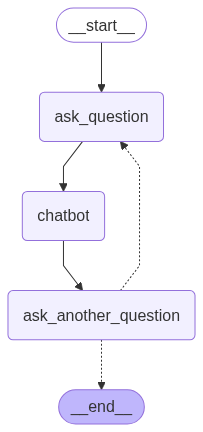

In [14]:
graph_compiled

In [15]:
graph_compiled.invoke(State(messages = []))


-------> ENTERING ask_question:
What is your question?

-------> ENTERING chatbot:
================================== Ai Message ==================================

Certainly! Piet Hein was a Danish poet and scientist known for his short, witty poems called "grooks." One of his most famous grooks is:

```
Losing one glove
is certainly painful,
but nothing
compared to the pain
of losing one,
throwing away the other,
and finding
the first one again.
```

This grook, like many of Hein's works, captures a simple yet profound observation about life. If you have a specific grook in mind

-------> ENTERING ask_another_question:
Would you like to ask one more question (yes/no)?


KeyboardInterrupt: Interrupted by user

## Reducer functions

In [17]:
def ask_question(state: State) -> State:
    
    print(f"\n-------> ENTERING ask_question:")
    for i in state["messages"]:
        i.pretty_print()
    
    question = "What is your question?"
    print(question)
    
    return State(messages = [AIMessage(question), HumanMessage(input())])

In [18]:
def chatbot(state: State) -> State:
    
    print(f"\n-------> ENTERING chatbot:")
    for i in state["messages"]:
        i.pretty_print()
    
    response = chat.invoke(state["messages"])
    response.pretty_print()
    
    return State(messages = [response])

In [19]:
def ask_another_question(state: State) -> State:
    
    print(f"\n-------> ENTERING ask_another_question:")
    for i in state["messages"]:
        i.pretty_print()
    
    question = "Would you like to ask one more question (yes/no)?"
    print(question)
    
    return State(messages = [AIMessage(question), HumanMessage(input())])

In [20]:
def routing_function(state: State) -> Literal["ask_question", "__end__"]:
    
    if state["messages"][-1].content == "yes":
        return "ask_question"
    else:
        return "__end__"

In [21]:
graph = StateGraph(State)

In [22]:
graph.add_node("ask_question", ask_question)
graph.add_node("chatbot", chatbot)
graph.add_node("ask_another_question", ask_another_question)

graph.add_edge(START, "ask_question")
graph.add_edge("ask_question", "chatbot")
graph.add_edge("chatbot", "ask_another_question")
graph.add_conditional_edges(source = "ask_another_question", 
                            path = routing_function)

In [23]:
graph_compiled = graph.compile()

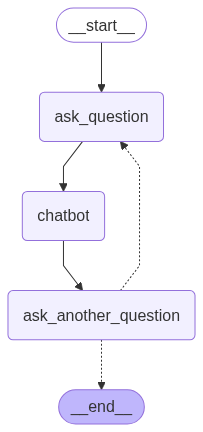

In [24]:
graph_compiled

In [25]:
graph_compiled.invoke(State(messages = []))


-------> ENTERING ask_question:
What is your question?

-------> ENTERING chatbot:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Can you tell me the grook by Piet Hein?
================================== Ai Message ==================================

Certainly! Piet Hein was a Danish poet and scientist known for his short, witty poems called "grooks." Here is one of his most famous grooks:

**The Road to Wisdom**

The road to wisdom?—Well, it's plain
and simple to express:
Err
and err
and err again,
but less
and less
and less.

This grook captures the essence of learning through experience and the gradual improvement that comes with making mistakes and learning from them. If you are interested

-------> ENTERING ask_another_question:
================================== Ai Message ==================================

What is your question?
=========

{'messages': [AIMessage(content='What is your question?', additional_kwargs={}, response_metadata={}, id='90a58200-1238-4e5a-bdb2-6c718396eb96'),
  HumanMessage(content='Can you tell me the grook by Piet Hein?', additional_kwargs={}, response_metadata={}, id='17d9c5d1-7931-46ca-8b13-a3b4a9264304'),
  AIMessage(content='Certainly! Piet Hein was a Danish poet and scientist known for his short, witty poems called "grooks." Here is one of his most famous grooks:\n\n**The Road to Wisdom**\n\nThe road to wisdom?—Well, it\'s plain\nand simple to express:\nErr\nand err\nand err again,\nbut less\nand less\nand less.\n\nThis grook captures the essence of learning through experience and the gradual improvement that comes with making mistakes and learning from them. If you are interested', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 27, 'total_tokens': 127, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_t

## Messages State

In [28]:
def ask_question(state: MessagesState) -> MessagesState:
    
    print(f"\n-------> ENTERING ask_question:")
    for i in state["messages"]:
        i.pretty_print()
    
    question = "What is your question?"
    print(question)
    
    return MessagesState(messages = [AIMessage(question), HumanMessage(input())])

In [29]:
def chatbot(state: MessagesState) -> MessagesState:
    
    print(f"\n-------> ENTERING chatbot:")
    for i in state["messages"]:
        i.pretty_print()
    
    response = chat.invoke(state["messages"])
    response.pretty_print()
    
    return MessagesState(messages = [response])

In [30]:
def ask_another_question(state: MessagesState) -> MessagesState:
    
    print(f"\n-------> ENTERING ask_another_question:")
    for i in state["messages"]:
        i.pretty_print()
    
    question = "Would you like to ask one more question (yes/no)?"
    print(question)
    
    return MessagesState(messages = [AIMessage(question), HumanMessage(input())])

In [31]:
def routing_function(state: MessagesState) -> Literal["ask_question", "__end__"]:
    
    if state["messages"][-1].content == "yes":
        return "ask_question"
    else:
        return "__end__"

In [32]:
graph = StateGraph(MessagesState)

In [33]:
graph.add_node("ask_question", ask_question)
graph.add_node("chatbot", chatbot)
graph.add_node("ask_another_question", ask_another_question)

graph.add_edge(START, "ask_question")
graph.add_edge("ask_question", "chatbot")
graph.add_edge("chatbot", "ask_another_question")
graph.add_conditional_edges(source = "ask_another_question", 
                            path = routing_function)

In [34]:
graph_compiled = graph.compile()

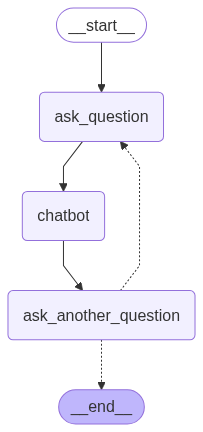

In [35]:
graph_compiled

In [36]:
graph_compiled.invoke(MessagesState(messages = []))


-------> ENTERING ask_question:
What is your question?

-------> ENTERING chatbot:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Can you tell me the grook by Piet Hein?
================================== Ai Message ==================================

Certainly! Piet Hein was a Danish poet and scientist known for his short, witty poems called "grooks." Here's one of his famous grooks:

```
Losing one glove
is certainly painful,
but nothing
compared to the pain
of losing one,
throwing away the other,
and finding
the first one again.
```

Piet Hein's grooks often contain philosophical insights wrapped in simple language and humor. If you have a specific grook in mind or want to hear

-------> ENTERING ask_another_question:
================================== Ai Message ==================================

What is your question?
=======================

{'messages': [AIMessage(content='What is your question?', additional_kwargs={}, response_metadata={}, id='2310bac0-b2a9-4d02-937f-86a8ecb3740b'),
  HumanMessage(content='Can you tell me the grook by Piet Hein?', additional_kwargs={}, response_metadata={}, id='05a1c6f0-fd42-4d7e-8499-bcae13ad28c1'),
  AIMessage(content='Certainly! Piet Hein was a Danish poet and scientist known for his short, witty poems called "grooks." Here\'s one of his famous grooks:\n\n```\nLosing one glove\nis certainly painful,\nbut nothing\ncompared to the pain\nof losing one,\nthrowing away the other,\nand finding\nthe first one again.\n```\n\nPiet Hein\'s grooks often contain philosophical insights wrapped in simple language and humor. If you have a specific grook in mind or want to hear', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 27, 'total_tokens': 127, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'r

## Adding RemoveMessages

In [38]:
my_list = add_messages([AIMessage("What is your question?"), 
                        HumanMessage("Could you tell me a grook by Piet Hein?"),
                        AIMessage("Certainly! Here's a well-known grook by Piet Hein..."),
                        AIMessage("Would you like to ask one more question?"),
                        HumanMessage("yes"),
                        AIMessage("What is your question?"),
                        HumanMessage("Where was the poet born?"),
                        AIMessage("Piet Hein was born in Copenhagen, Denmark, on December 16, 1905."),
                        AIMessage("Would you like to ask one more question?")],
                       [HumanMessage("yes")]
                      )

In [39]:
remove_messages = [RemoveMessage(id = i.id) for i in my_list[:-5]]

In [40]:
remove_messages

[RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='0713a689-754d-42b8-9d9e-3872dd2fa514'),
 RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='87917634-9ed0-426d-80df-8189ace34a24'),
 RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='ab4f2af2-1b47-4dac-abd9-6fcb25932f7e'),
 RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='54ca9afa-e5e3-49c1-bfb2-61ec105e5159'),
 RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='80ee34aa-c439-496e-a70f-f54f4ee43aaa')]

In [41]:
add_messages(my_list, remove_messages)

[AIMessage(content='What is your question?', additional_kwargs={}, response_metadata={}, id='b55ffc81-d7b4-4a4e-b10e-33cbf909d6d8'),
 HumanMessage(content='Where was the poet born?', additional_kwargs={}, response_metadata={}, id='85718b66-e177-4fbf-a773-2bdbd0e6f5e1'),
 AIMessage(content='Piet Hein was born in Copenhagen, Denmark, on December 16, 1905.', additional_kwargs={}, response_metadata={}, id='b648dd98-152a-464d-bb08-7525d2982688'),
 AIMessage(content='Would you like to ask one more question?', additional_kwargs={}, response_metadata={}, id='92aa00ab-f73a-4f2d-85c6-ce178b0f42ba'),
 HumanMessage(content='yes', additional_kwargs={}, response_metadata={}, id='cec391f5-7c8d-4ff7-942a-49e3371885bb')]